In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import shutil
from toolbox_jocha.hdf5 import get_data_from_dataset
import matplotlib.pyplot as plt

def return_dataframe(filename):
    return pd.read_csv(filename).set_index("id")

def copy_dataframe(input_file, output_file):
    if not os.path.exists(output_file):
        shutil.copyfile(input_file, output_file)

# WT_folder = f"D:/mouse_data/new_data/df_output/any_lag/WT"
# GCaMP_folder = f"D:/mouse_data/new_data/df_output/any_lag/GCaMP"
data_folder = f"C:/Users/torte/Downloads/new_df"

files = ["nvc", "funcsim", "funcrep", "modularity"]
file_id = f"v2_mvmt"

def y_offset_signals(signals):
    
    mins = np.empty(len(signals))
    maxs = np.empty(len(signals))

    for i in range(len(signals)):

        if i == 0:
            signals[i] -= np.min(signals[i])
            mins[i] = np.min(signals[i])
            maxs[i] = np.max(signals[i])
            continue

        diff = maxs[i-1] - np.min(signals[i])
        signals[i] += diff

        mins[i] = np.min(signals[i])
        maxs[i] = np.max(signals[i])

    return signals

# mouse_num = "322-10"
# signals, _ = get_data_from_dataset(f"E:/Backup_SSD_Jordan/TO_CC/M{mouse_num}_v2_mvmt.h5", "registration/3d/GCaMP")


# signals = np.squeeze(signals[:,0,:])
# print(signals.shape)

# signals_list = [signals[:,i] for i in range(signals.shape[1])]

# signals_list = y_offset_signals(signals_list)


# for i in range(signals.shape[1]):
#     plt.plot(signals_list[i], label=f"Region {i}")
# plt.legend()
# plt.show()

Make a copy of the WT files for the combined dataframe.

In [ ]:
# for file in files:

#     WT_df_filename = os.path.join(WT_folder, file+"_WT_"+file_id+".csv")
#     GCaMP_df_filename = os.path.join(GCaMP_folder, file+"_GCaMP_"+file_id+".csv")
#     destination_df_filename = os.path.join(combined_folder, file+"_combined_"+file_id+".csv")

#     WT_df = return_dataframe(WT_df_filename)
#     GCaMP_df = return_dataframe(GCaMP_df_filename)

#     combined_df = pd.concat((WT_df, GCaMP_df), axis=0)

#     combined_df.to_csv(destination_df_filename)

#     # print(combined_df)

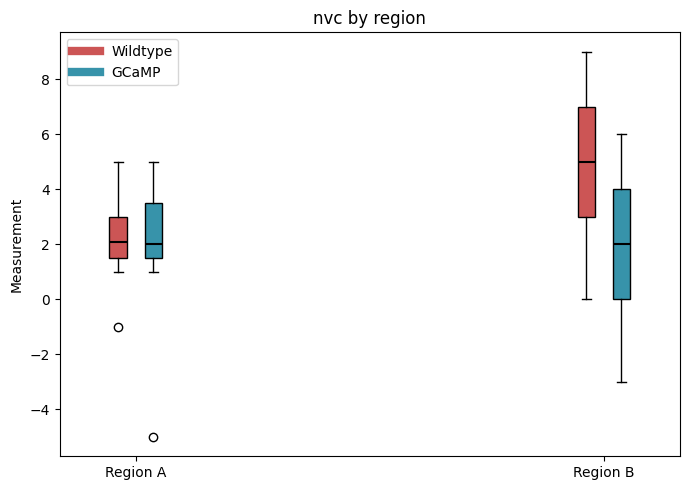

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def grouped_boxplot(groups, regions, legend, params=None):
    """
    Plot grouped boxplots, where each tuple in `groups` represents a pair of datasets.
    
    Parameters
    ----------
    groups : list of tuples
        Each tuple contains two data arrays, e.g. [(data1, data2), (data3, data4), ...]
    regions : list of str
        Labels for each group, displayed on the x-axis.
    params : dict, optional
        Dictionary that may include:
        - colors: list of colors, e.g. ['skyblue', 'salmon']
        - figsize: tuple, e.g. (8, 5)
        - title: str
        - ylabel: str
        - group_gap: float
        - pair_gap: float
        - box_width: float
        
    Returns
    -------
    fig : matplotlib.figure.Figure
        The figure object for further customization or saving.
    """
    
    # --- Default parameters ---
    defaults = {
        "colors": ["skyblue", "salmon"],
        "figsize": (8, 5),
        "title": "Grouped Boxplots",
        "ylabel": "Value",
        "group_gap": 1.5,
        "pair_gap": 0.2,
        "box_width": 0.15,
    }
    if params is not None:
        defaults.update(params)
    p = defaults  # shorter alias
    
    # --- Setup figure ---
    fig, ax = plt.subplots(figsize=p["figsize"])
    
    positions = []
    box_data = []
    color_list = []

    pos = 1
    for g in groups:
        if len(g) != len(p["colors"]):
            raise ValueError("Each group must have the same number of datasets as there are colors.")
        box_data.extend(g)
        for i in range(len(g)):
            positions.append(pos + i * p["pair_gap"])
            color_list.append(p["colors"][i])
        pos += len(g) + p["group_gap"]

    # --- Create boxplots ---
    bp = ax.boxplot(
        box_data,
        positions=positions,
        widths=p["box_width"],
        patch_artist=True,
        medianprops=dict(color='black', linewidth=1.5),
    )

    # --- Apply colors and borders ---
    for patch, c in zip(bp['boxes'], color_list):
        patch.set_facecolor(c)
        patch.set_edgecolor('black')

    # --- Axis and labels ---
    xtick_positions = [
        np.mean(positions[i:i+len(p["colors"])])
        for i in range(0, len(positions), len(p["colors"]))
    ]
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(regions)
    ax.set_xlim(min(positions) - 0.5, max(positions) + 0.5)
    ax.set_ylabel(p["ylabel"])
    ax.set_title(p["title"])

    # --- Legend ---
    handles = [
        plt.Line2D([0], [0], color=c, lw=6, label=f"{legend[i]}")
        for i, c in enumerate(p["colors"])
    ]
    ax.legend(handles=handles)

    plt.tight_layout()
    return fig


###################### EXAMPLE

data = np.array([1, 2, -1, 5, 3, 3, 2.1])
data2 = np.array([1, 5, 2, -5, 4, 3, 2])
data3 = np.array([7, 6, 5, 1, 3, 4, 0, 9, 9])
data4 = np.array([6, 1, -1, -3, 2, 3, 5])

groups = [(data, data2), (data3, data4)]
regions = ["Region A", "Region B"]
legend = ["Wildtype", "GCaMP"]

params = {
    "colors": ["#cc5555", "#3793aa"],
    "title": "nvc by region",
    "ylabel": "Measurement",
    "figsize": (7, 5),
    "group_gap": 2.0,
    "pair_gap": 0.3
}

fig = grouped_boxplot(groups, regions, legend, params)
plt.show()



In [27]:
def return_dataframe(filename):
    return pd.read_csv(filename).set_index("id")

df_path = os.path.join(data_folder, f"nvc_region_Somatosensory_left_v2_mvmt_df.csv")

df = return_dataframe(df_path)
# print(df)

# print(f"###############################################")

# df = df["GCaMP"]
# print(df)

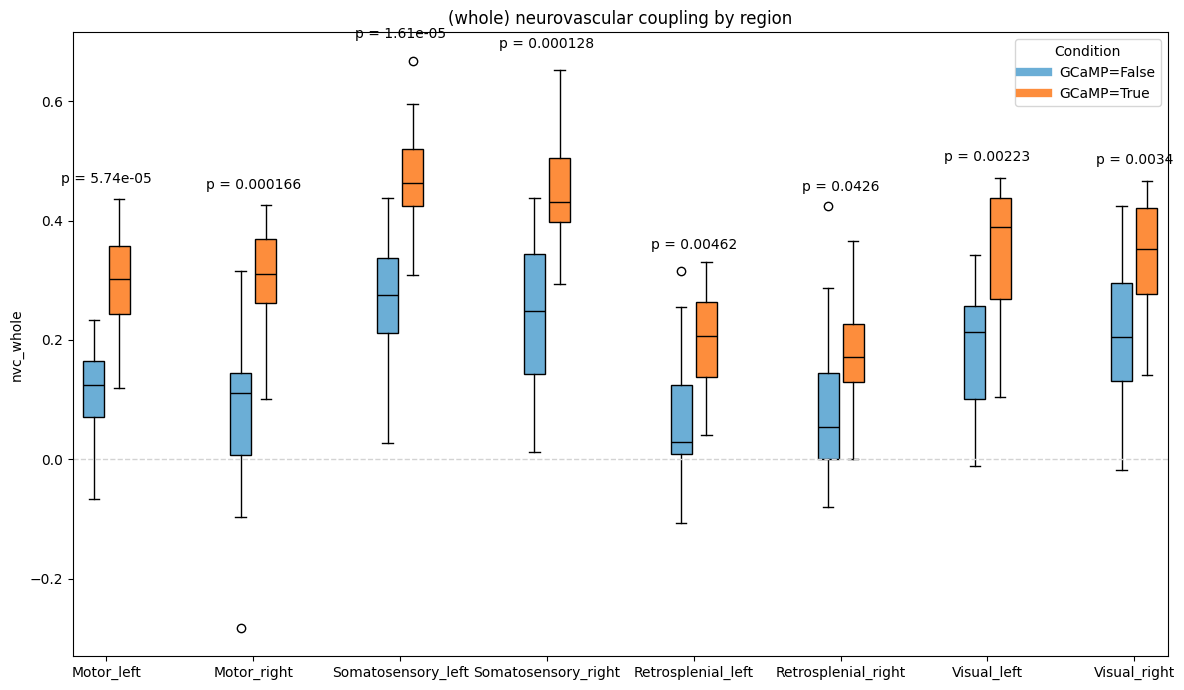

In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def grouped_boxplot(groups, regions, params=None, pval_func=None):
    defaults = {
        "colors": ["skyblue", "salmon"],
        "figsize": (8, 5),
        "title": "Grouped Boxplots",
        "ylabel": "Value",
        "group_gap": 1.5,
        "pair_gap": 0.2,
        "box_width": 0.15,
        "box_linewidth": 1.5,      # NEW: thickness of box edges
        "legend_labels": ["GCaMP=False", "GCaMP=True"],
        "pval_fontsize": 10,       # NEW: font size for p-values
        "pval_y_offset": 0.05,     # NEW: vertical offset above box
    }
    if params is not None:
        defaults.update(params)
    p = defaults

    fig, ax = plt.subplots(figsize=p["figsize"])
    positions, box_data, color_list = [], [], []

    pos = 1
    for g in groups:
        if len(g) != len(p["colors"]):
            raise ValueError("Each group must have the same number of datasets as there are colors.")
        box_data.extend(g)
        for i in range(len(g)):
            positions.append(pos + i * p["pair_gap"])
            color_list.append(p["colors"][i])
        pos += len(g) + p["group_gap"]

    # ---- Create boxplots ----
    bp = ax.boxplot(
        box_data,
        positions=positions,
        widths=p["box_width"],
        patch_artist=True,
        medianprops=dict(color='black', linewidth=p["box_linewidth"]),
        boxprops=dict(linewidth=p["box_linewidth"]),
        whiskerprops=dict(linewidth=p["box_linewidth"]),
        capprops=dict(linewidth=p["box_linewidth"]),
    )

    # ---- Apply colors ----
    for patch, c in zip(bp['boxes'], color_list):
        patch.set_facecolor(c)
        patch.set_edgecolor('black')

    # ---- Grey dashed line at y=0 ----
    ax.axhline(0, color="lightgrey", linestyle="--", linewidth=1)

    # ---- Axis labels ----
    xtick_positions = [
        np.mean(positions[i:i+len(p["colors"])])
        for i in range(0, len(positions), len(p["colors"]))
    ]
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(regions)
    ax.set_xlim(min(positions) - 0.5, max(positions) + 0.5)
    ax.set_ylabel(p["ylabel"])
    ax.set_title(p["title"])

    # ---- P-values ----
    if pval_func is not None:
        for i, g in enumerate(groups):
            try:
                pval = pval_func(g[0], g[1])
            except Exception as e:
                pval = np.nan
                print(f"Warning: failed to compute p-value for group {regions[i]} ({e})")

            # get position for label
            xpos = xtick_positions[i]
            y_max = max(
                np.nanmax(g[0]) if len(g[0]) else 0,
                np.nanmax(g[1]) if len(g[1]) else 0
            )
            y_text = y_max + abs(y_max) * p["pval_y_offset"]
            ax.text(
                xpos, y_text,
                f"p = {pval:.3g}" if not np.isnan(pval) else "p = n/a",
                ha='center', va='bottom',
                fontsize=p["pval_fontsize"]
            )

    # ---- Legend ----
    handles = [
        plt.Line2D([0], [0], color=c, lw=6, label=lbl)
        for c, lbl in zip(p["colors"], p["legend_labels"])
    ]
    ax.legend(handles=handles, title="Condition")

    plt.tight_layout()
    return fig


# ---------------------------
# CSV-to-boxplot logic
# ---------------------------

def plot_csv_groups(filenames, regions, column, params=None, pval_func=None):
    groups = []

    for fname in filenames:
        df = pd.read_csv(fname)
        if "GCaMP" not in df.columns:
            raise ValueError(f"'GCaMP' column missing in {fname}")
        if column not in df.columns:
            raise ValueError(f"'{column}' column missing in {fname}")

        data_false = df.loc[df["GCaMP"] == False, column].dropna().values
        data_true = df.loc[df["GCaMP"] == True, column].dropna().values
        groups.append((data_false, data_true))

    fig = grouped_boxplot(groups, regions, params, pval_func=pval_func)
    return fig


# ---------------------------
# Example usage
# ---------------------------

import scipy.stats as stats

data_folder = f"C:/Users/torte/Downloads/new_df"
regions = ["Motor_left", "Motor_right", "Somatosensory_left", "Somatosensory_right", "Retrosplenial_left", "Retrosplenial_right", "Visual_left", "Visual_right"]
files = [os.path.join(data_folder, f"nvc_region_{region}_v2_mvmt_df.csv") for region in regions]

# Example: use Mann-Whitney U test as p-value function
def pval_func(a, b):
    if len(a) == 0 or len(b) == 0:
        return np.nan
    _, pval = stats.mannwhitneyu(a, b, alternative="two-sided")
    return pval

params = {
    "colors": ["#6baed6", "#fd8d3c"],
    "title": "(whole) neurovascular coupling by region",
    "ylabel": "nvc_whole",
    "figsize": (12, 7),
    "legend_labels": ["GCaMP=False", "GCaMP=True"],
    "box_linewidth": 1,  # thicker boxe lines,
    "box_width": 0.5,
    "pair_gap": 0.6
}

fig = plot_csv_groups(files, regions, column="nvc_whole", params=params, pval_func=pval_func)
plt.show()


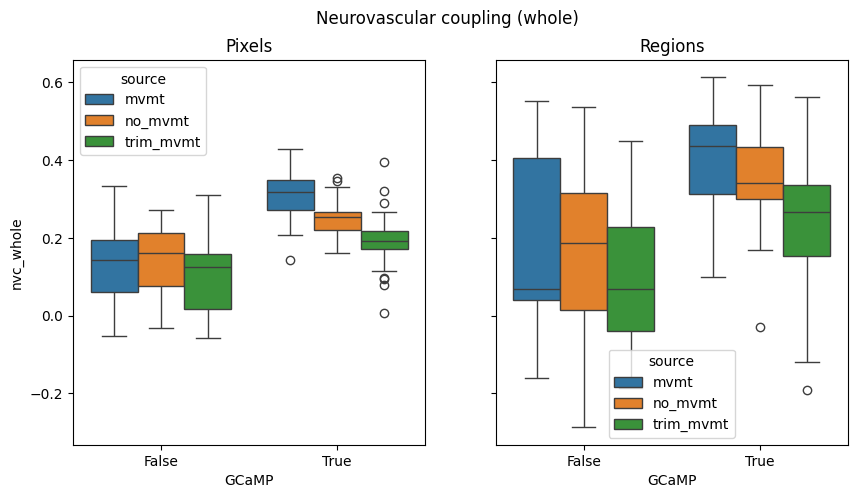

PIXELS:
mwu for mvmt: 0.00013
mwu for mvmt corrected: 0.00161
mwu for mvmt trimmed: 0.00417
ind. t-test for mvmt: 0.00000
ind. t-test for mvmt corrected: 0.00014
ind. t-test for mvmt trimmed: 0.00620
REGIONS:
mwu for mvmt: 0.02048
mwu for mvmt corrected: 0.01879
mwu for mvmt trimmed: 0.04258
ind. t-test for mvmt: 0.00130
ind. t-test for mvmt corrected: 0.00449
ind. t-test for mvmt trimmed: 0.03682


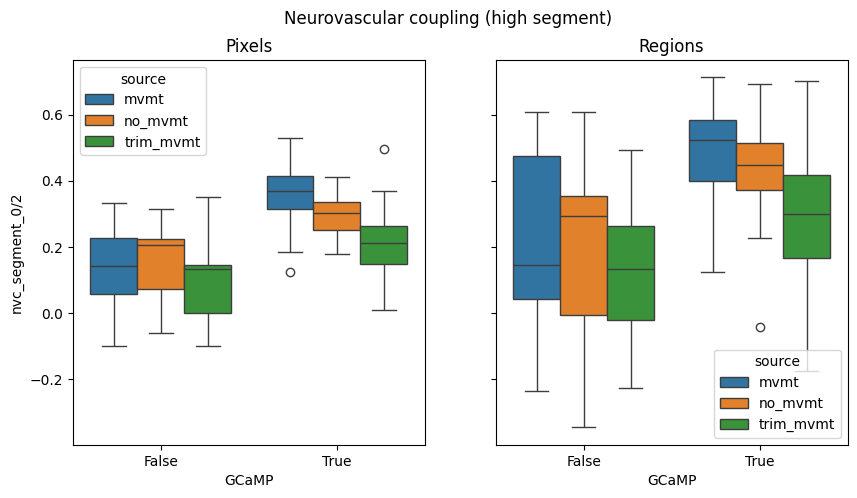

PIXELS:
mwu for mvmt: 0.00007
mwu for mvmt corrected: 0.00073
mwu for mvmt trimmed: 0.00564
ind. t-test for mvmt: 0.00000
ind. t-test for mvmt corrected: 0.00004
ind. t-test for mvmt trimmed: 0.00330
REGIONS:
mwu for mvmt: 0.01003
mwu for mvmt corrected: 0.01578
mwu for mvmt trimmed: 0.05756
ind. t-test for mvmt: 0.00053
ind. t-test for mvmt corrected: 0.00246
ind. t-test for mvmt trimmed: 0.03045


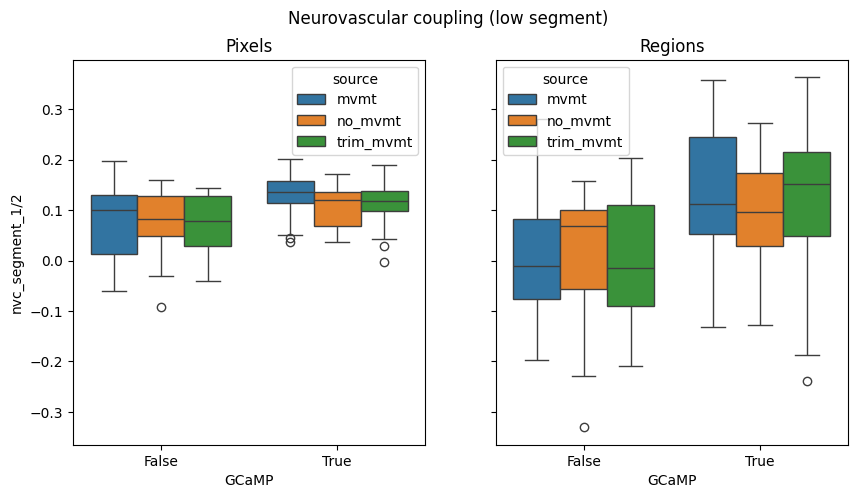

PIXELS:
mwu for mvmt: 0.02636
mwu for mvmt corrected: 0.24657
mwu for mvmt trimmed: 0.08802
ind. t-test for mvmt: 0.00818
ind. t-test for mvmt corrected: 0.06257
ind. t-test for mvmt trimmed: 0.02626
REGIONS:
mwu for mvmt: 0.02425
mwu for mvmt corrected: 0.14750
mwu for mvmt trimmed: 0.01578
ind. t-test for mvmt: 0.01957
ind. t-test for mvmt corrected: 0.07726
ind. t-test for mvmt trimmed: 0.01628


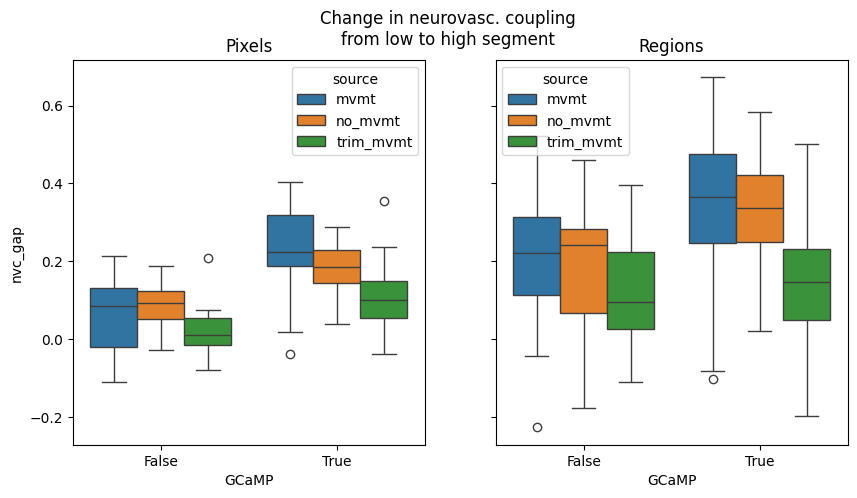

PIXELS:
mwu for mvmt: 0.00021
mwu for mvmt corrected: 0.00031
mwu for mvmt trimmed: 0.00622
ind. t-test for mvmt: 0.00007
ind. t-test for mvmt corrected: 0.00005
ind. t-test for mvmt trimmed: 0.01134
REGIONS:
mwu for mvmt: 0.05346
mwu for mvmt corrected: 0.01879
mwu for mvmt trimmed: 0.58426
ind. t-test for mvmt: 0.05561
ind. t-test for mvmt corrected: 0.01134
ind. t-test for mvmt trimmed: 0.57057


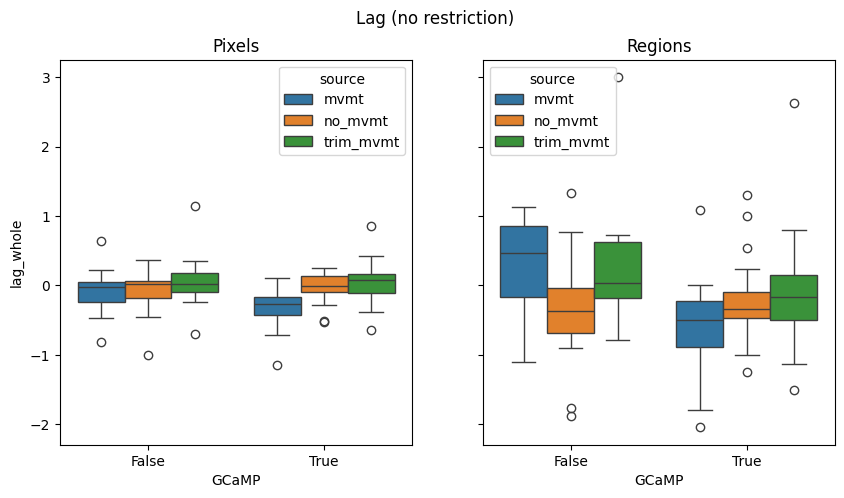

PIXELS:
mwu for mvmt: 0.01578
mwu for mvmt corrected: 0.72330
mwu for mvmt trimmed: 0.89756
ind. t-test for mvmt: 0.02417
ind. t-test for mvmt corrected: 0.35648
ind. t-test for mvmt trimmed: 0.80887
REGIONS:
mwu for mvmt: 0.00460
mwu for mvmt corrected: 0.82168
mwu for mvmt trimmed: 0.09393
ind. t-test for mvmt: 0.00079
ind. t-test for mvmt corrected: 0.59052
ind. t-test for mvmt trimmed: 0.14117


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind

def mwu_test(df, data_str):

    WT_array = np.array(df[df["GCaMP"] == False][data_str])
    GCaMP_array = np.array(df[df["GCaMP"] == True][data_str])

    return mannwhitneyu(GCaMP_array, WT_array)

def print_mwu_values(df_list, id_list, data_str):

    for i, df in enumerate(df_list):
        print(f"mwu for {id_list[i]}: {mwu_test(df, data_str).pvalue:.5f}")

def print_ttest_values(df_list, id_list, data_str):
    
    for i, df in enumerate(df_list):
        WT_array = np.array(df[df["GCaMP"] == False][data_str])
        GCaMP_array = np.array(df[df["GCaMP"] == True][data_str])
        print(f"ind. t-test for {id_list[i]}: {ttest_ind(GCaMP_array, WT_array).pvalue:.5f}")

def show_boxplot(whole_dataframes, registered_dataframes, x, y, hue, title, data_strings):
    # dataframe format is [all, df1, df2, df3, ...]

    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

    sns.boxplot(whole_dataframes[0], x=x, y=y, hue=hue, ax=axes[0])
    sns.boxplot(registered_dataframes[0], x=x, y=y, hue=hue, ax=axes[1])
    axes[0].set_title("Pixels")
    axes[1].set_title("Regions")
    fig.suptitle(title)
    plt.show()
    print(f"PIXELS:")
    print_mwu_values(whole_dataframes[1:], data_strings, y)
    print_ttest_values(whole_dataframes[1:], data_strings, y)
    print(f"REGIONS:")
    print_mwu_values(registered_dataframes[1:], data_strings, y)
    print_ttest_values(registered_dataframes[1:], data_strings, y)

def format_dataframes(metric, file_ids, data_folder):

    whole_dfs = []
    registered_dfs = []

    for i, file_id in enumerate(file_ids):
        whole_dfs.append(return_dataframe(os.path.join(data_folder, f"{metric}_whole_v2_{file_id}_df.csv")))
        registered_dfs.append(return_dataframe(os.path.join(data_folder, f"{metric}_registered_v2_{file_id}_df.csv")))

        whole_dfs[i]["source"] = file_id
        registered_dfs[i]["source"] = file_id

    whole_df_all = pd.concat(whole_dfs)
    registered_df_all = pd.concat(registered_dfs)

    return [whole_df_all]+whole_dfs, [registered_df_all]+registered_dfs



whole_dataframes, registered_dataframes = format_dataframes("nvc", ["mvmt", "no_mvmt", "trim_mvmt"], data_folder)

for df in whole_dataframes:
    df["nvc_gap"] = df["nvc_segment_0/2"] - df["nvc_segment_1/2"]
for df in registered_dataframes:
    df["nvc_gap"] = df["nvc_segment_0/2"] - df["nvc_segment_1/2"]



show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="nvc_whole", hue="source", title="Neurovascular coupling (whole)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="nvc_segment_0/2", hue="source", title="Neurovascular coupling (high segment)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="nvc_segment_1/2", hue="source", title="Neurovascular coupling (low segment)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="nvc_gap", hue="source", title="Change in neurovasc. coupling\nfrom low to high segment",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="lag_whole", hue="source", title="Lag (no restriction)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])

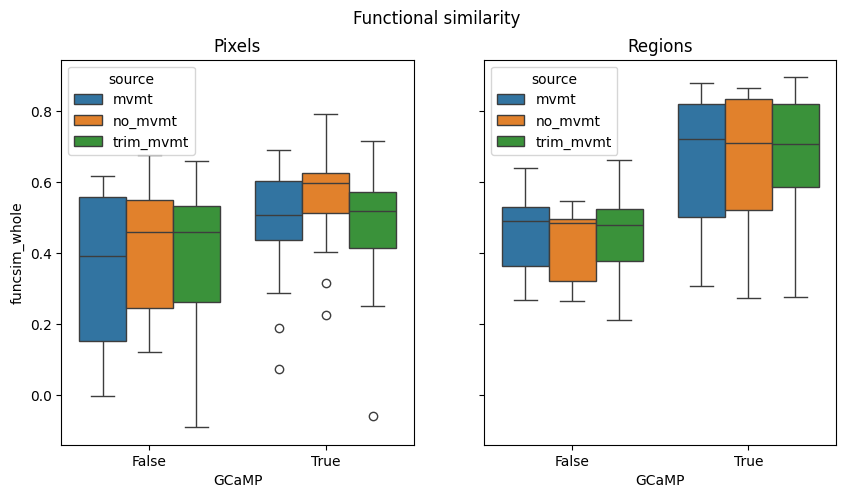

PIXELS:
mwu for mvmt: 0.08802
mwu for mvmt corrected: 0.01444
mwu for mvmt trimmed: 0.17642
ind. t-test for mvmt: 0.02988
ind. t-test for mvmt corrected: 0.00456
ind. t-test for mvmt trimmed: 0.12749
REGIONS:
mwu for mvmt: 0.00180
mwu for mvmt corrected: 0.00073
mwu for mvmt trimmed: 0.00057
ind. t-test for mvmt: 0.00040
ind. t-test for mvmt corrected: 0.00011
ind. t-test for mvmt trimmed: 0.00014


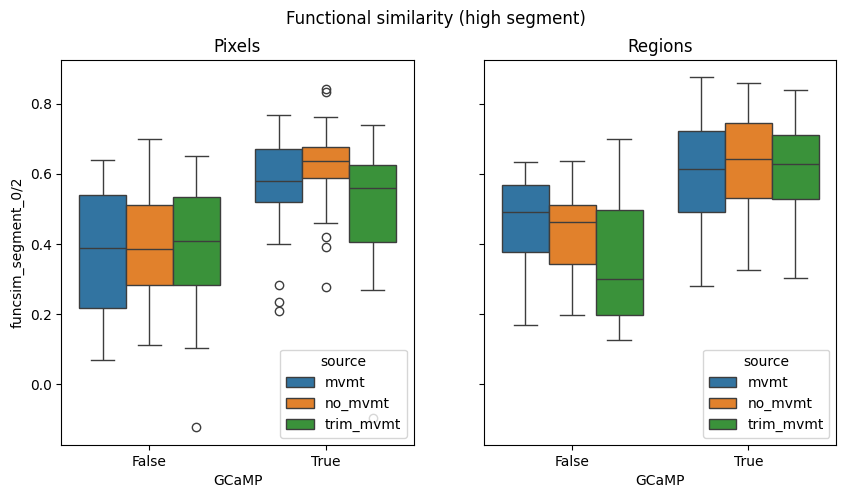

PIXELS:
mwu for mvmt: 0.01003
mwu for mvmt corrected: 0.00180
mwu for mvmt trimmed: 0.04598
ind. t-test for mvmt: 0.00258
ind. t-test for mvmt corrected: 0.00024
ind. t-test for mvmt trimmed: 0.04910
REGIONS:
mwu for mvmt: 0.05756
mwu for mvmt corrected: 0.00144
mwu for mvmt trimmed: 0.00144
ind. t-test for mvmt: 0.03241
ind. t-test for mvmt corrected: 0.00082
ind. t-test for mvmt trimmed: 0.00018


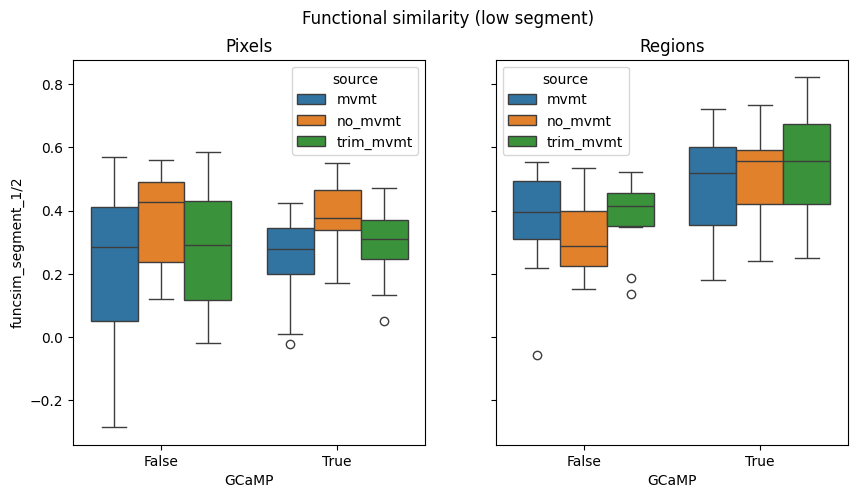

PIXELS:
mwu for mvmt: 0.74755
mwu for mvmt corrected: 0.77206
mwu for mvmt trimmed: 0.89756
ind. t-test for mvmt: 0.67060
ind. t-test for mvmt corrected: 0.99888
ind. t-test for mvmt trimmed: 0.51720
REGIONS:
mwu for mvmt: 0.08219
mwu for mvmt corrected: 0.00040
mwu for mvmt trimmed: 0.00417
ind. t-test for mvmt: 0.06243
ind. t-test for mvmt corrected: 0.00005
ind. t-test for mvmt trimmed: 0.00126


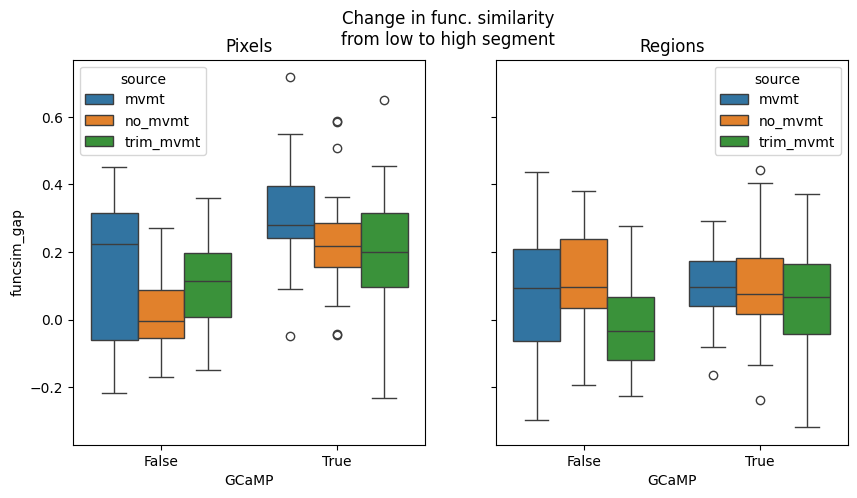

PIXELS:
mwu for mvmt: 0.03940
mwu for mvmt corrected: 0.00103
mwu for mvmt trimmed: 0.10754
ind. t-test for mvmt: 0.01276
ind. t-test for mvmt corrected: 0.00041
ind. t-test for mvmt trimmed: 0.09075
REGIONS:
mwu for mvmt: 0.74755
mwu for mvmt corrected: 0.72330
mwu for mvmt trimmed: 0.27380
ind. t-test for mvmt: 0.71290
ind. t-test for mvmt corrected: 0.89546
ind. t-test for mvmt trimmed: 0.27209


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

whole_dataframes, registered_dataframes = format_dataframes("funcsim", ["mvmt", "no_mvmt", "trim_mvmt"], data_folder)

for df in whole_dataframes:
    df["funcsim_gap"] = df["funcsim_segment_0/2"] - df["funcsim_segment_1/2"]
for df in registered_dataframes:
    df["funcsim_gap"] = df["funcsim_segment_0/2"] - df["funcsim_segment_1/2"]



show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="funcsim_whole", hue="source", title="Functional similarity",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="funcsim_segment_0/2", hue="source", title="Functional similarity (high segment)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="funcsim_segment_1/2", hue="source", title="Functional similarity (low segment)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="funcsim_gap", hue="source", title="Change in func. similarity\nfrom low to high segment",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


In [31]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# mvmt_df = return_dataframe(os.path.join(data_folder, f"funcsim_whole_v2_mvmt_df.csv"))
# no_mvmt_df = return_dataframe(os.path.join(data_folder, f"funcsim_whole_v2_no_mvmt_df.csv"))
# trim_mvmt_df = return_dataframe(os.path.join(data_folder, f"funcsim_whole_v2_trim_mvmt_df.csv"))

# mvmt_df["source"] = "w/ mvmt."
# no_mvmt_df["source"] = "mvmt. corrected"
# trim_mvmt_df["source"] = "mvmt. trimmed"

# df_all = pd.concat([mvmt_df, no_mvmt_df, trim_mvmt_df])

# df_all["funcsim_gap"] = df_all["funcsim_segment_0/2"] - df_all["funcsim_segment_1/2"]

# sns.boxplot(df_all, x="GCaMP", y="funcsim_whole", hue="source")
# plt.title(f"Functional similarity")
# plt.show()
# print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_whole")

# sns.boxplot(df_all, x="GCaMP", y="funcsim_segment_0/2", hue="source")
# plt.title(f"Functional similarity (high segment)")
# plt.show()
# print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_segment_0/2")

# sns.boxplot(df_all, x="GCaMP", y="funcsim_segment_1/2", hue="source")
# plt.title(f"Functional similarity (low segment)")
# plt.show()
# print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_segment_1/2")

# sns.boxplot(df_all, x="GCaMP", y="funcsim_gap", hue="source")
# plt.title(f"Change in func. similarity\nfrom low to high segment")
# plt.show()

# mvmt_df["funcsim_gap"] = mvmt_df["funcsim_segment_0/2"] - mvmt_df["funcsim_segment_1/2"]
# no_mvmt_df["funcsim_gap"] = no_mvmt_df["funcsim_segment_0/2"] - no_mvmt_df["funcsim_segment_1/2"]
# trim_mvmt_df["funcsim_gap"] = trim_mvmt_df["funcsim_segment_0/2"] - trim_mvmt_df["funcsim_segment_1/2"]
# print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_gap")

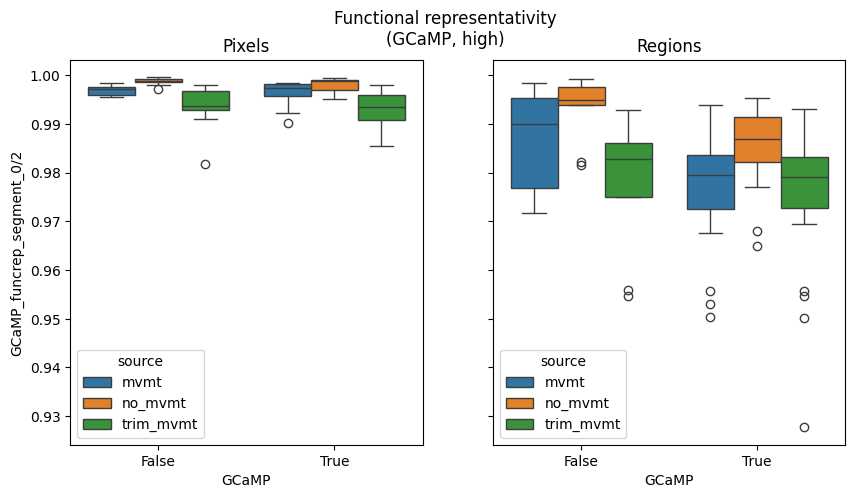

PIXELS:
mwu for mvmt: 0.79680
mwu for mvmt corrected: 0.16635
mwu for mvmt trimmed: 0.40267
ind. t-test for mvmt: 0.71908
ind. t-test for mvmt corrected: 0.08736
ind. t-test for mvmt trimmed: 0.83730
REGIONS:
mwu for mvmt: 0.03104
mwu for mvmt corrected: 0.00129
mwu for mvmt trimmed: 0.51974
ind. t-test for mvmt: 0.01728
ind. t-test for mvmt corrected: 0.00257
ind. t-test for mvmt trimmed: 0.63087


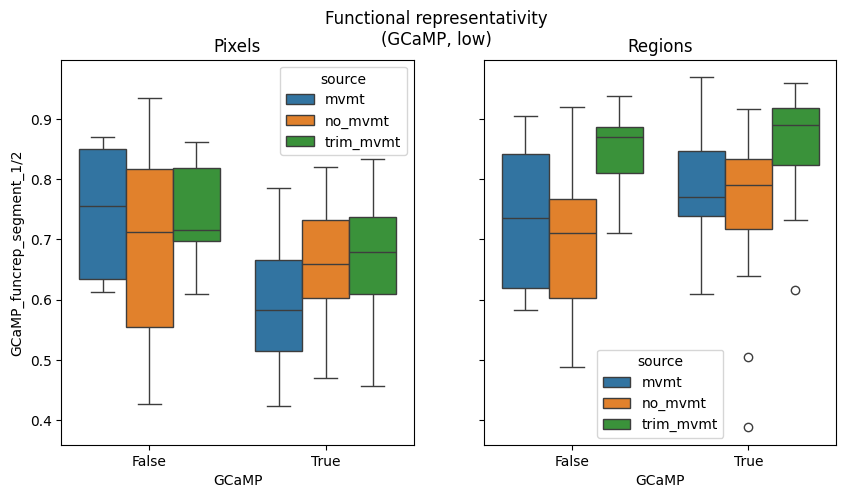

PIXELS:
mwu for mvmt: 0.00180
mwu for mvmt corrected: 0.56234
mwu for mvmt trimmed: 0.04960
ind. t-test for mvmt: 0.00025
ind. t-test for mvmt corrected: 0.50704
ind. t-test for mvmt trimmed: 0.03215
REGIONS:
mwu for mvmt: 0.22129
mwu for mvmt corrected: 0.10069
mwu for mvmt trimmed: 0.28816
ind. t-test for mvmt: 0.10999
ind. t-test for mvmt corrected: 0.12572
ind. t-test for mvmt trimmed: 0.47961


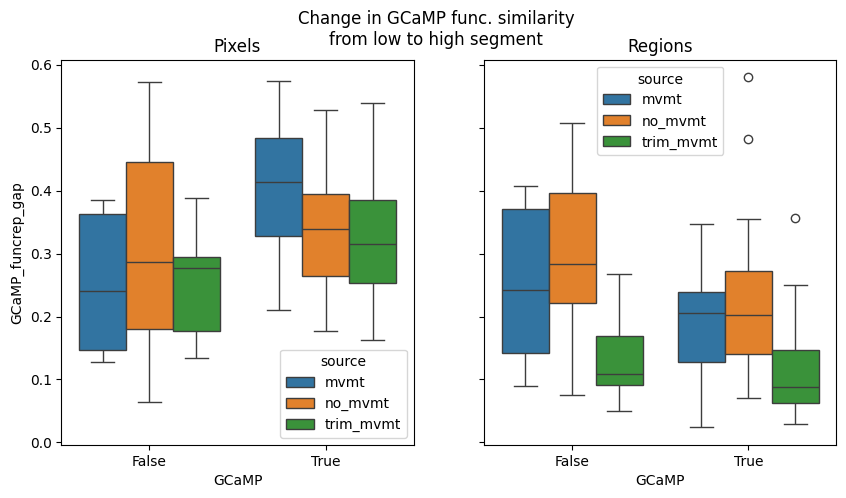

PIXELS:
mwu for mvmt: 0.00161
mwu for mvmt corrected: 0.56234
mwu for mvmt trimmed: 0.06656
ind. t-test for mvmt: 0.00027
ind. t-test for mvmt corrected: 0.51847
ind. t-test for mvmt trimmed: 0.03367
REGIONS:
mwu for mvmt: 0.13871
mwu for mvmt corrected: 0.07668
mwu for mvmt trimmed: 0.27380
ind. t-test for mvmt: 0.05631
ind. t-test for mvmt corrected: 0.08792
ind. t-test for mvmt trimmed: 0.41381


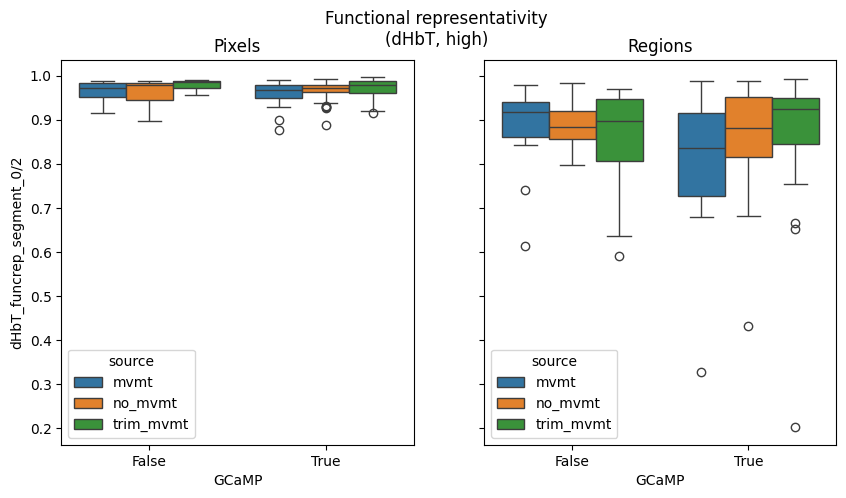

PIXELS:
mwu for mvmt: 0.69932
mwu for mvmt corrected: 0.62923
mwu for mvmt trimmed: 0.33424
ind. t-test for mvmt: 0.63300
ind. t-test for mvmt corrected: 0.89579
ind. t-test for mvmt trimmed: 0.19493
REGIONS:
mwu for mvmt: 0.19793
mwu for mvmt corrected: 0.58426
mwu for mvmt trimmed: 0.47887
ind. t-test for mvmt: 0.29139
ind. t-test for mvmt corrected: 0.44998
ind. t-test for mvmt trimmed: 0.69670


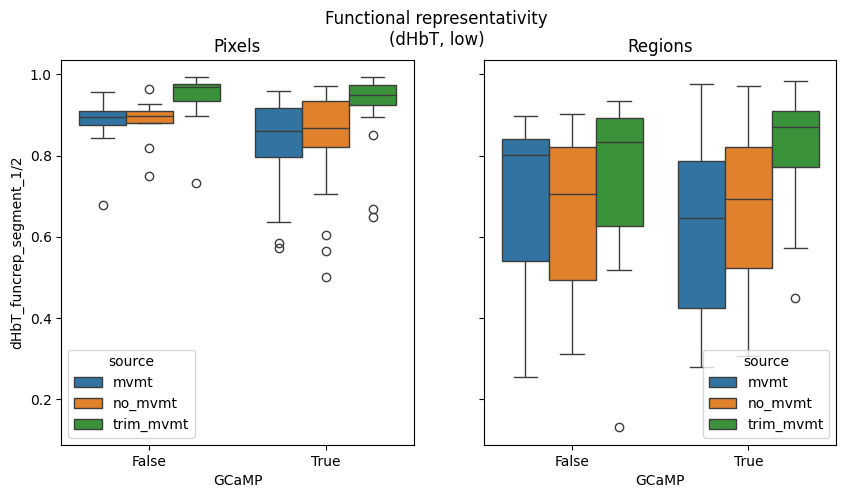

PIXELS:
mwu for mvmt: 0.24657
mwu for mvmt corrected: 0.38482
mwu for mvmt trimmed: 0.51974
ind. t-test for mvmt: 0.24091
ind. t-test for mvmt corrected: 0.29662
ind. t-test for mvmt trimmed: 0.70771
REGIONS:
mwu for mvmt: 0.33424
mwu for mvmt corrected: 0.92308
mwu for mvmt trimmed: 0.22129
ind. t-test for mvmt: 0.48022
ind. t-test for mvmt corrected: 0.74875
ind. t-test for mvmt trimmed: 0.15697


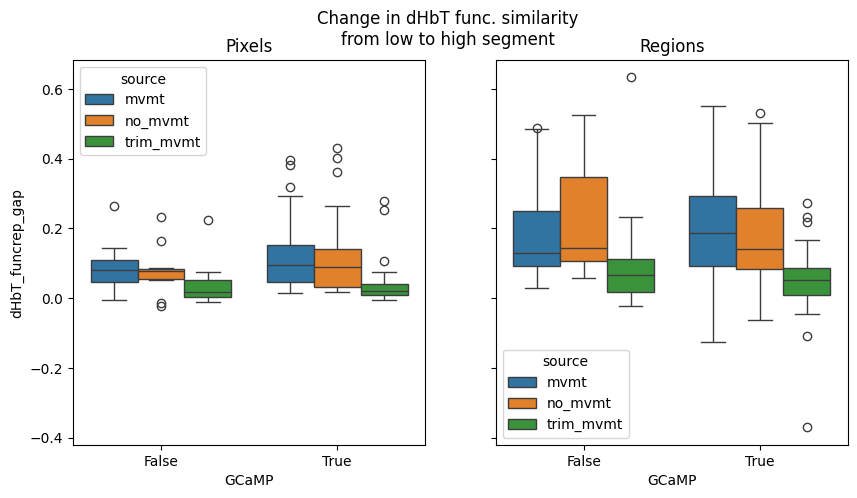

PIXELS:
mwu for mvmt: 0.43983
mwu for mvmt corrected: 0.31838
mwu for mvmt trimmed: 0.69932
ind. t-test for mvmt: 0.27878
ind. t-test for mvmt corrected: 0.26721
ind. t-test for mvmt trimmed: 0.94912
REGIONS:
mwu for mvmt: 0.60656
mwu for mvmt corrected: 0.49909
mwu for mvmt trimmed: 0.49909
ind. t-test for mvmt: 0.96906
ind. t-test for mvmt corrected: 0.35467
ind. t-test for mvmt trimmed: 0.17077


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

whole_dataframes, registered_dataframes = format_dataframes("funcrep", ["mvmt", "no_mvmt", "trim_mvmt"], data_folder)

for df in whole_dataframes:
    df["GCaMP_funcrep_gap"] = df["GCaMP_funcrep_segment_0/2"] - df["GCaMP_funcrep_segment_1/2"]
    df["dHbT_funcrep_gap"] = df["dHbT_funcrep_segment_0/2"] - df["dHbT_funcrep_segment_1/2"]
for df in registered_dataframes:
    df["GCaMP_funcrep_gap"] = df["GCaMP_funcrep_segment_0/2"] - df["GCaMP_funcrep_segment_1/2"]
    df["dHbT_funcrep_gap"] = df["dHbT_funcrep_segment_0/2"] - df["dHbT_funcrep_segment_1/2"]



show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="GCaMP_funcrep_segment_0/2", hue="source", title="Functional representativity\n(GCaMP, high)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="GCaMP_funcrep_segment_1/2", hue="source", title="Functional representativity\n(GCaMP, low)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="GCaMP_funcrep_gap", hue="source", title="Change in GCaMP func. similarity\nfrom low to high segment",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])

show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="dHbT_funcrep_segment_0/2", hue="source", title="Functional representativity\n(dHbT, high)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="dHbT_funcrep_segment_1/2", hue="source", title="Functional representativity\n(dHbT, low)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="dHbT_funcrep_gap", hue="source", title="Change in dHbT func. similarity\nfrom low to high segment",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])

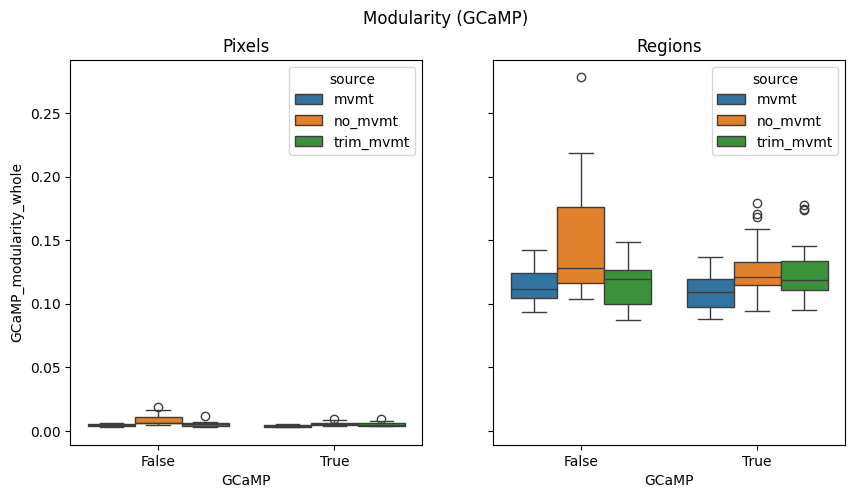

PIXELS:
mwu for mvmt: 0.02048
mwu for mvmt corrected: 0.01879
mwu for mvmt trimmed: 0.94867
ind. t-test for mvmt: 0.00411
ind. t-test for mvmt corrected: 0.00281
ind. t-test for mvmt trimmed: 0.59194
REGIONS:
mwu for mvmt: 0.45912
mwu for mvmt corrected: 0.22129
mwu for mvmt trimmed: 0.33424
ind. t-test for mvmt: 0.26881
ind. t-test for mvmt corrected: 0.03196
ind. t-test for mvmt trimmed: 0.19450


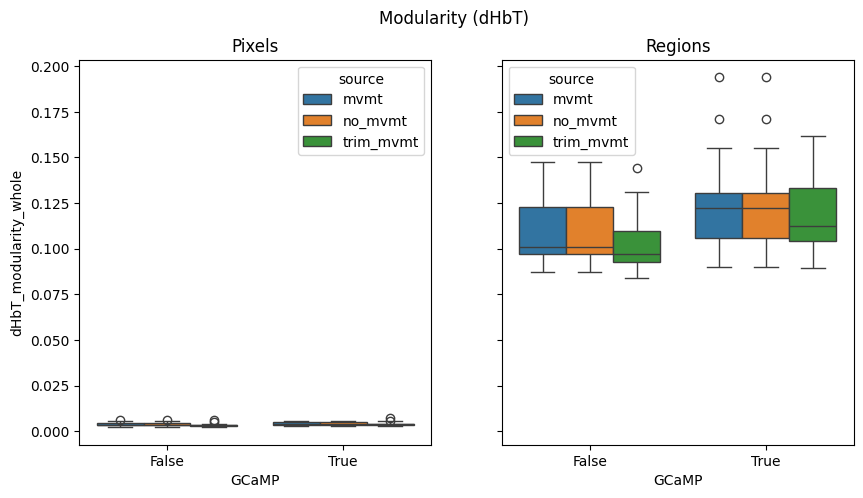

PIXELS:
mwu for mvmt: 0.69932
mwu for mvmt corrected: 0.69932
mwu for mvmt trimmed: 0.10754
ind. t-test for mvmt: 0.72452
ind. t-test for mvmt corrected: 0.72452
ind. t-test for mvmt trimmed: 0.29412
REGIONS:
mwu for mvmt: 0.13033
mwu for mvmt corrected: 0.13033
mwu for mvmt trimmed: 0.06192
ind. t-test for mvmt: 0.14235
ind. t-test for mvmt corrected: 0.14235
ind. t-test for mvmt trimmed: 0.06348


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

whole_dataframes, registered_dataframes = format_dataframes("modularity", ["mvmt", "no_mvmt", "trim_mvmt"], data_folder)



show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="GCaMP_modularity_whole", hue="source", title="Modularity (GCaMP)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


show_boxplot(whole_dataframes=whole_dataframes, registered_dataframes=registered_dataframes,
             x="GCaMP", y="dHbT_modularity_whole", hue="source", title="Modularity (dHbT)",
             data_strings=["mvmt", "mvmt corrected", "mvmt trimmed"])


# Preview FC

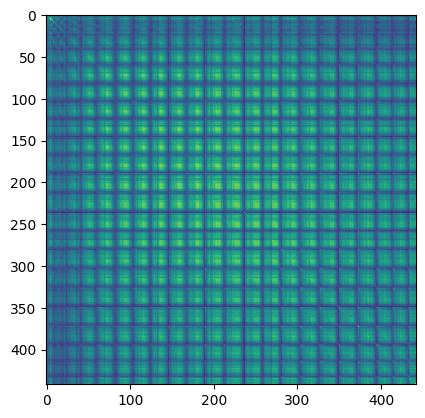

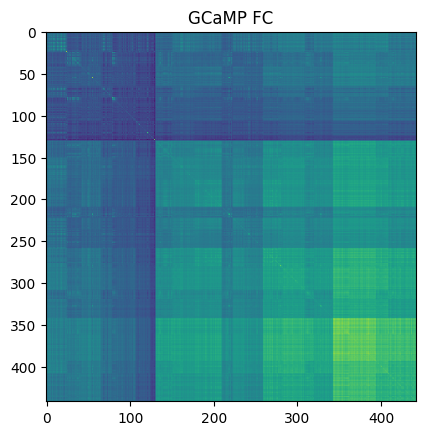

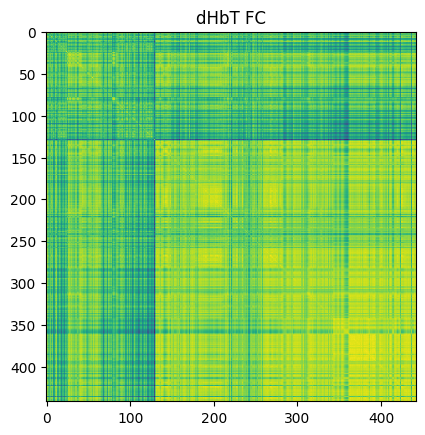

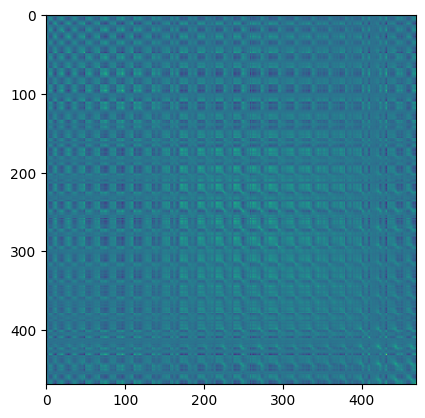

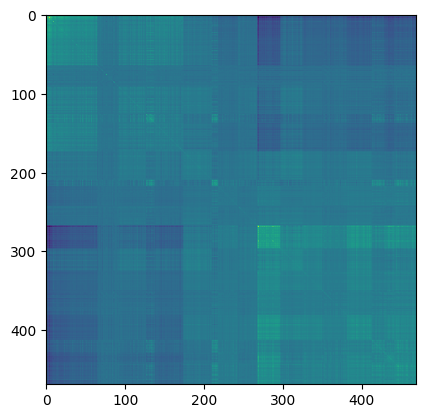

In [33]:
from toolbox_jocha.hdf5 import get_data_from_dataset
from numba import njit
from toolbox_jocha.ets import split_into_bins, format_array
import matplotlib.pyplot as plt

def compute_dfc_flat(signals):
    T, N = signals.shape
    # print(f"{T}, {N}")
    triu_len = (N * (N + 1)) // 2  # Number of upper triangle elements (including diagonal)
    dFC_flat = np.zeros((T, triu_len))

    for t in range(T):
        idx = 0
        for i in range(N):
            for j in range(i, N):
                dFC_flat[t, idx] = signals[t, i] * signals[t, j]
                idx += 1

    return dFC_flat

def return_dfc_filename(mouse_num, id, signal_str):
    return f"D:/mouse_data/new_data/M{mouse_num}/formatted/M{mouse_num}_{id}_{signal_str}_dfc.h5"

def load_dfc(mouse_num, id, signal_str):
    dfc, _ = get_data_from_dataset(return_dfc_filename(mouse_num, id, signal_str), "dfc")
    return dfc

def compute_fc(dfc, indices=None):
    if indices is not None:
        dfc = dfc[indices,:]

    fc = np.nanmean(dfc, axis=0)

    return fc

def flat_to_symmetric(flat, N):
    """Convert a flattened upper triangle vector to a full symmetric matrix."""
    mat = np.zeros((N, N))
    inds = np.triu_indices(N)
    mat[inds] = flat
    mat[(inds[1], inds[0])] = flat  # Reflect upper triangle to lower
    return mat

def to_square_fc(fc):

    N = int((np.sqrt(8*fc.shape[0]+1)-1)/2)
    sym_FC = flat_to_symmetric(fc, N)

    return sym_FC

# ==========================================================================
#
# ==========================================================================

mouse_num = "316-8"
id = "v1_mvmt"
signal_str = "GCaMP"

dfc = load_dfc(mouse_num, id, signal_str)

fc = compute_fc(dfc)

square_fc = to_square_fc(fc)

plt.imshow(square_fc, cmap="viridis")
plt.show()

from toolbox_jocha.community_detection import hierarchical_clustering, reorder_communities, plot_reordered_and_communities

linkage_mat, clusters = hierarchical_clustering(square_fc, show=False)

reordered_fc = reorder_communities(square_fc, clusters)

dhbt_dfc = load_dfc(mouse_num, id, "dHbT")
dhbt_fc = compute_fc(dhbt_dfc)
dhbt_square_fc = to_square_fc(dhbt_fc)

reordered_dhbt_fc = reorder_communities(dhbt_square_fc, clusters)

plt.imshow(reordered_fc)
plt.title("GCaMP FC")
plt.show()

plt.imshow(reordered_dhbt_fc)
plt.title("dHbT FC")
plt.show()


# WILDTYPE

mouse_num = "39-12"
id = "v1_mvmt"
signal_str = "GCaMP"

dfc = load_dfc(mouse_num, id, signal_str)

fc = compute_fc(dfc)

square_fc = to_square_fc(fc)

plt.imshow(square_fc, cmap="viridis")
plt.show()

from toolbox_jocha.community_detection import hierarchical_clustering, reorder_communities, plot_reordered_and_communities

linkage_mat, clusters = hierarchical_clustering(square_fc, show=False)

reordered_fc = reorder_communities(square_fc, clusters)

plt.imshow(reordered_fc)
plt.show()

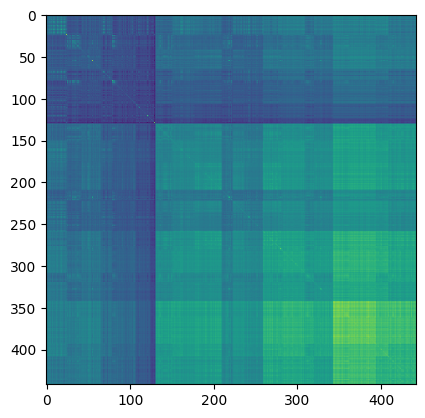